In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Read the CSV file
df = pd.read_csv('metadata.csv')
df = df.transpose()
df.columns = df.iloc[2]
df = df.drop(['Series Code', 'Country Code', 'Country Name'])
df.head(7)

Country Name,Germany,Japan,"Korea, Rep.",Germany,Japan,"Korea, Rep.",Germany,Japan,"Korea, Rep.",Germany,...,Japan,"Korea, Rep.",Germany,Japan,"Korea, Rep.",NaN,NaN,NaN,NaN,NaN
Series Name,GDP per capita (current US$),GDP per capita (current US$),GDP per capita (current US$),GDP (current US$),GDP (current US$),GDP (current US$),GDP growth (annual %),GDP growth (annual %),GDP growth (annual %),GDP per capita growth (annual %),...,GNI (current US$),GNI (current US$),GNI per capita growth (annual %),GNI per capita growth (annual %),GNI per capita growth (annual %),NaN,NaN,NaN,Data from database: World Development Indicators,Last Updated: 01/28/2025
1999 [YR1999],26965.492277,36610.168316,10672.447559,2213873468586.879883,4635982224063.879883,497514040642.262024,2.130117,-0.33393,11.466942,2.064127,...,4692903320960.639648,492026567258.013977,1.871627,-0.675941,9.928984,NaN,NaN,NaN,NaN,NaN
2000 [YR2000],23925.85599,39169.35957,12257.020662,1966980701145.100098,4968359075956.589844,576179387819.613037,2.877246,2.764648,9.060833,2.738012,...,5040235511364.950195,572324070533.154053,1.648158,2.242065,5.585269,NaN,NaN,NaN,NaN,NaN
2001 [YR2001],23878.364147,34406.182464,11561.207175,1966381496641.72998,4374711694090.870117,547656279894.586975,1.636541,0.386103,4.8524,1.465706,...,4442724323185.679688,543949912726.203003,1.365454,0.283274,3.168858,NaN,NaN,NaN,NaN,NaN
2002 [YR2002],25486.594201,32820.793643,13165.083625,2102350798305.889893,4182846045873.609863,627246933729.618042,-0.22831,0.041962,7.725143,-0.395914,...,4243893355026.0,624918960556.18103,-0.223686,-0.334418,8.005227,NaN,NaN,NaN,NaN,NaN
2003 [YR2003],30711.102251,35387.03742,14672.805754,2534715518349.009766,4519561645253.530273,702714855193.904053,-0.529929,1.535125,3.147291,-0.584984,...,4592583679436.919922,700262887098.860962,-0.216012,1.1154,2.139672,NaN,NaN,NaN,NaN,NaN
2004 [YR2004],34566.735914,38298.980171,16496.131617,2852317768061.779785,4893116005656.55957,793175561887.026978,1.162368,2.186116,5.197391,1.184333,...,4987574981745.580078,791800835959.093018,2.837557,1.993095,3.885797,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Isolate the data for each matrics but keep Series Name for double check

metrics = [
    'GDP per capita (current US$)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita growth (annual %)',
    'GNI (current US$)',
    'GNI per capita growth (annual %)'
]
dfs = []

for i in range(len(metrics)):
    dfs.append(df.loc[:, df.iloc[0] == metrics[i]]) 

for i, df_metric in enumerate(dfs):
    print(f"Metric {i+1}: {metrics[i]}")
    print(df_metric.head())
    print("-" * 50)

Metric 1: GDP per capita (current US$)
Country Name                        Germany                         Japan  \
Series Name    GDP per capita (current US$)  GDP per capita (current US$)   
1999 [YR1999]                  26965.492277                  36610.168316   
2000 [YR2000]                   23925.85599                   39169.35957   
2001 [YR2001]                  23878.364147                  34406.182464   
2002 [YR2002]                  25486.594201                  32820.793643   

Country Name                    Korea, Rep.  
Series Name    GDP per capita (current US$)  
1999 [YR1999]                  10672.447559  
2000 [YR2000]                  12257.020662  
2001 [YR2001]                  11561.207175  
2002 [YR2002]                  13165.083625  
--------------------------------------------------
Metric 2: GDP (current US$)
Country Name                Germany                 Japan          Korea, Rep.
Series Name       GDP (current US$)     GDP (current US$)    GDP

In [ ]:
import pandas as pd

countries = ['Germany', 'Japan', 'South Korea']

df_finals = []

for i in range(len(dfs)):
    matric = dfs[i].iloc[1:].copy()  
    matric.columns = countries

    matric = matric.reset_index()  
    matric = matric.rename(columns={"index": "Year"}) 

    matric["Year"] = matric["Year"].str[:4].astype(int)

    for country in countries:
        matric[country] = pd.to_numeric(matric[country], errors='coerce') 

    df_finals.append(matric)

for i, df_metric in enumerate(df_finals):
    print(f"Metric {i+1}: {metrics[i]}")
    print(df_metric.head()) 
    print("-" * 50) 


In [ ]:
# Remove Series Name and fix column names

countries = ['Germany', 'Japan', 'South Korea']

df_finals = []

for i in range(len(dfs)):
    matric = dfs[i].iloc[1:]  
    matric.columns = countries
    
    matric = matric.reset_index()  
    matric = matric.rename(columns={"index": "Year"}) 
    matric["Year"] = matric["Year"].str[:4].astype(int)
    
    for country in countries:
        matric[country] = pd.to_numeric(matric[country], errors='coerce') 

    df_finals.append(matric)

for i, df_metric in enumerate(df_finals):
    print(f"Metric {i+1}: {metrics[i]}")
    print(df_metric.head())  
    print("-" * 50)

Metric 1: GDP per capita (current US$)
   Year       Germany         Japan   South Korea
0  1999  26965.492277  36610.168316  10672.447559
1  2000  23925.855990  39169.359570  12257.020662
2  2001  23878.364147  34406.182464  11561.207175
3  2002  25486.594201  32820.793643  13165.083625
4  2003  30711.102251  35387.037420  14672.805754
--------------------------------------------------
Metric 2: GDP (current US$)
   Year       Germany         Japan   South Korea
0  1999  2.213873e+12  4.635982e+12  4.975140e+11
1  2000  1.966981e+12  4.968359e+12  5.761794e+11
2  2001  1.966381e+12  4.374712e+12  5.476563e+11
3  2002  2.102351e+12  4.182846e+12  6.272469e+11
4  2003  2.534716e+12  4.519562e+12  7.027149e+11
--------------------------------------------------
Metric 3: GDP growth (annual %)
   Year   Germany     Japan  South Korea
0  1999  2.130117 -0.333930    11.466942
1  2000  2.877246  2.764648     9.060833
2  2001  1.636541  0.386103     4.852400
3  2002 -0.228310  0.041962     7.7

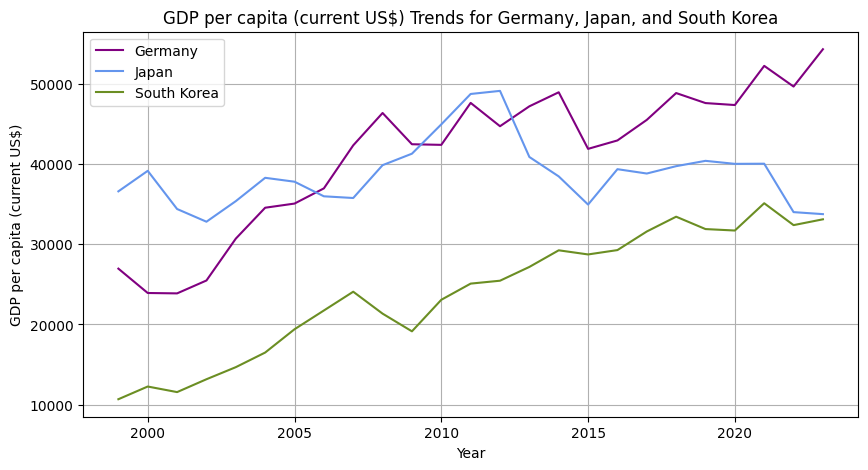

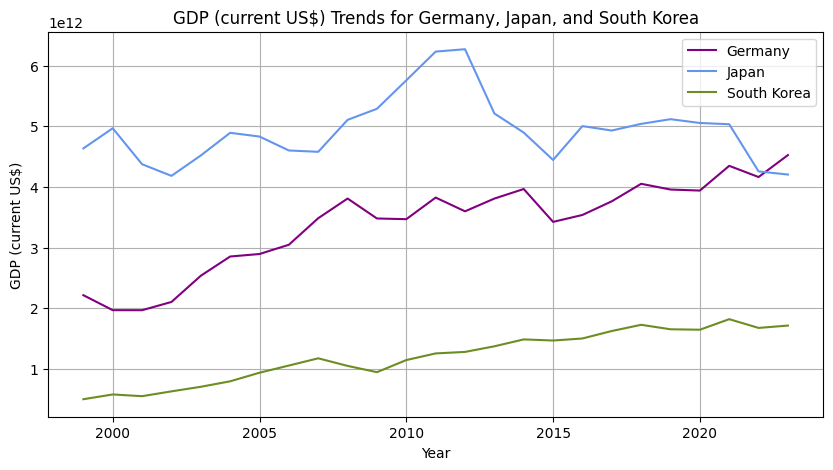

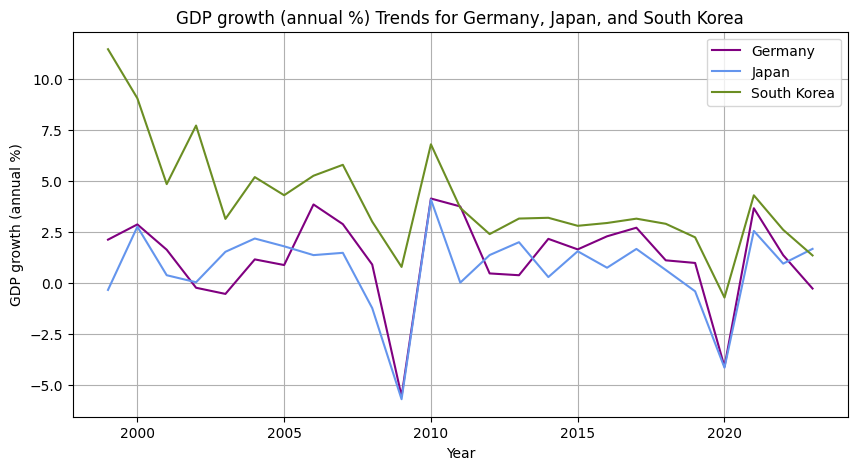

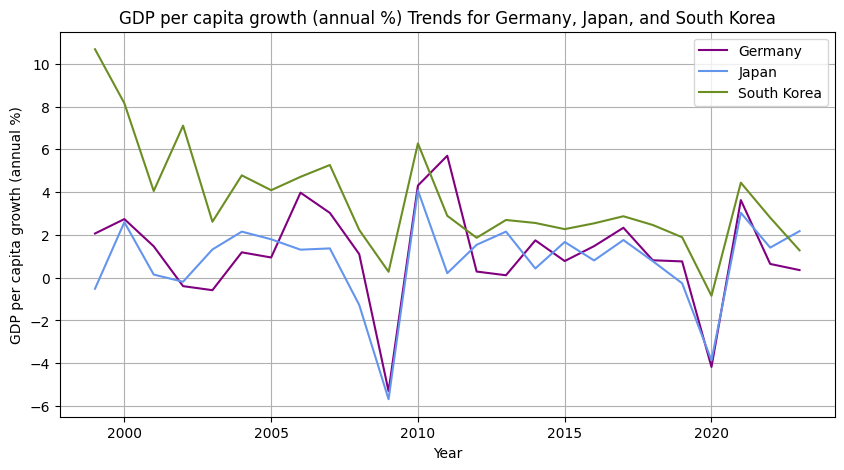

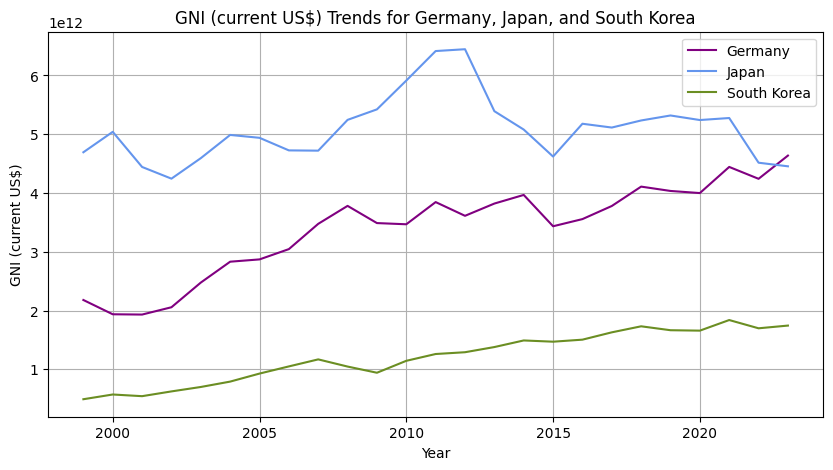

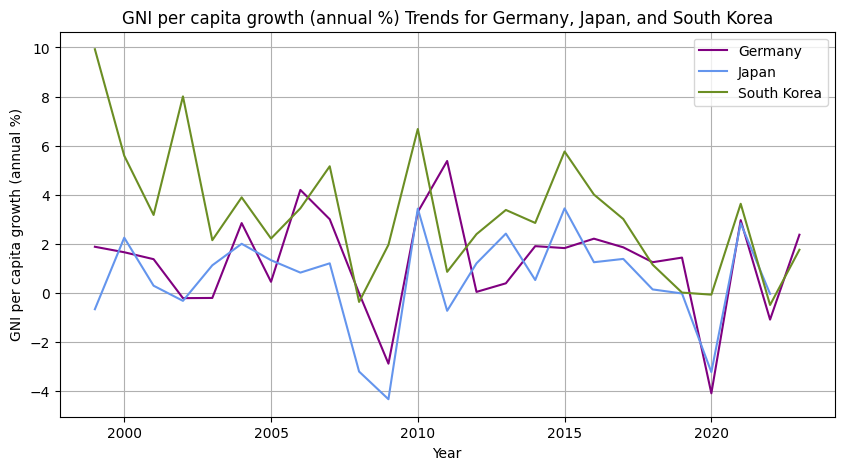

In [ ]:
colors = ['purple', 'cornflowerblue', 'olivedrab']
metrics = [
    'GDP per capita (current US$)',
    'GDP (current US$)',
    'GDP growth (annual %)',
    'GDP per capita growth (annual %)',
    'GNI (current US$)',
    'GNI per capita growth (annual %)'
]
countries = ['Germany', 'Japan', 'South Korea']

# Plot
for i, df_final in enumerate(df_finals):  
    plt.figure(figsize=(10, 5))
    
    for j, country in enumerate(countries):  
        plt.plot(df_final["Year"], df_final[country], color=colors[j], label=country)

    plt.xlabel("Year")
    plt.ylabel(metrics[i]) 
    plt.title(f"{metrics[i]} Trends for Germany, Japan, and South Korea")
    plt.legend()
    plt.grid(True)
    plt.show()


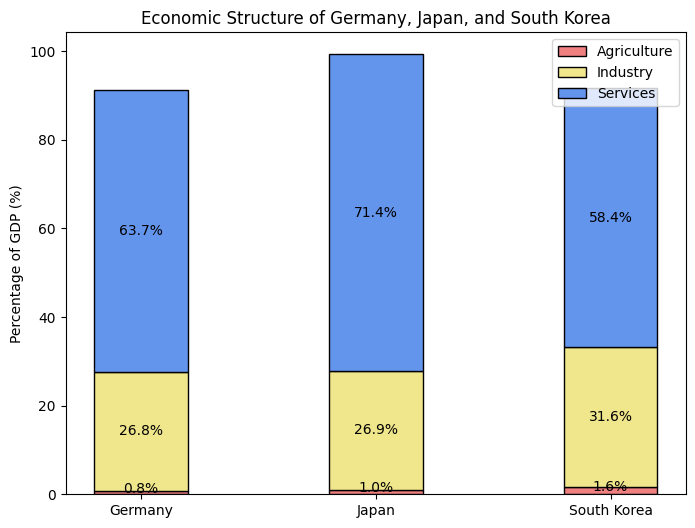

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the three countries
countries = ["Germany", "Japan", "South Korea"]
services = [63.7, 71.4, 58.4]  # Service sector as % of GDP
industry = [26.8, 26.9, 31.6]  # Industry sector as % of GDP
agriculture = [0.8, 1.0, 1.6]  # Agriculture sector as % of GDP

# Bar width and positions
bar_width = 0.4
x = np.arange(len(countries))

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(8, 6))
bars1 = ax.bar(x, agriculture, bar_width, label="Agriculture", color="lightcoral", edgecolor='black')
bars2 = ax.bar(x, industry, bar_width, bottom=agriculture, label="Industry", color="khaki", edgecolor='black')
bars3 = ax.bar(x, services, bar_width, bottom=np.array(agriculture) + np.array(industry), 
       label="Services", color="cornflowerblue", edgecolor='black')

# Adding the percentages on bars
for i in range(len(countries)):
    ax.text(x[i], agriculture[i] / 2, f"{agriculture[i]}%", ha='center', va='baseline', color="black", fontsize=10)
    ax.text(x[i], agriculture[i] + industry[i] / 2, f"{industry[i]}%", ha='center', va='center', color="black", fontsize=10)
    ax.text(x[i], agriculture[i] + industry[i] + services[i] / 2, f"{services[i]}%", ha='center', va='center', color="black", fontsize=10)

# Labels and title
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.set_ylabel("Percentage of GDP (%)", fontsize=10)
ax.set_title("Economic Structure of Germany, Japan, and South Korea")
ax.legend()

# Display the plot
plt.show()
